pip install pandas scikit-learn matplotlib seaborn

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '‪C:/Users/HP/Downloads/Survey (1).csv'

# Attempt to load the dataset
try:
    data = pd.read_csv(file_path)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"File not found at the specified path: {file_path}")
except pd.errors.EmptyDataError:
    print("The file is empty.")
except pd.errors.ParserError:
    print("Error parsing the file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# Proceed only if data is successfully loaded
if 'data' in locals():
    # Inspect the data
    print(data.head())
    print(data.info())

    # Ensure all relevant columns are numeric and handle any missing values
    data_numeric = data.select_dtypes(include=[float, int])

    # Handle missing values by removing rows with NAs
    data_numeric = data_numeric.dropna()

    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_numeric)

    # Determine the optimal number of clusters using the Elbow method
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(data_scaled)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10, 5))
    plt.plot(range(1, 11), wcss, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

    # Using Silhouette method to determine optimal number of clusters
    silhouette_scores = []
    for n_cluster in range(2, 11):
        kmeans = KMeans(n_clusters=n_cluster).fit(data_scaled)
        label = kmeans.labels_
        sil_coeff = silhouette_score(data_scaled, label, metric='euclidean')
        silhouette_scores.append(sil_coeff)

    plt.figure(figsize=(10, 5))
    plt.plot(range(2, 11), silhouette_scores, marker='o')
    plt.title('Silhouette Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Coefficient')
    plt.show()

    # Choose the optimal number of clusters (e.g., k = 3 based on Elbow and Silhouette methods)
    n_clusters = 3
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    data['Cluster'] = kmeans.labels_

    # Visualizing the clusters
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data_scaled[:, 0], data_scaled[:, 1], hue=data['Cluster'], palette='viridis')
    plt.title('Cluster Plot')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

    # Inspect the resulting clusters
    print(data.groupby('Cluster').mean())
else:
    print("Data could not be loaded. Please check the file path and data format.")


An unexpected error occurred: [Errno 22] Invalid argument: '\u202aC:/Users/HP/Downloads/Survey (1).csv'
Data could not be loaded. Please check the file path and data format.


Data loaded successfully.
        City Sex    Age      Occupation Monthly Household Income  Income  \
0  Bangalore   M  26-35  Private Sector         85,001 to105,000   95000   
1  Bangalore   M  46-60  Government/PSU         45,001 to 65,000   55000   
2  Bangalore   F  46-60  Government/PSU         25,001 to 45,000   35000   
3  Bangalore   M  36-45  Private Sector                  >125000  200000   
4  Bangalore   M  26-35   Self Employed         85,001 to105,000   95000   

  Planning to Buy a new house Time Frame Reasons for buying a house  \
0                         Yes  6M to 1Yr                   Residing   
1                         Yes  6M to 1Yr                 Investment   
2                         Yes  <6 Months              Rental Income   
3                         Yes  <6 Months                 Investment   
4                         Yes     1-2 Yr                   Residing   

  what type of House  ... 4. Availability of domestic help Time  Size Budgets  \
0        

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

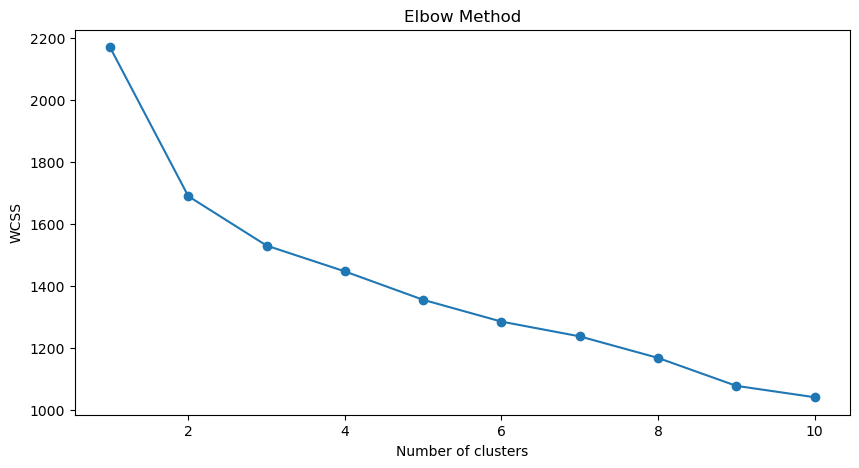

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\a

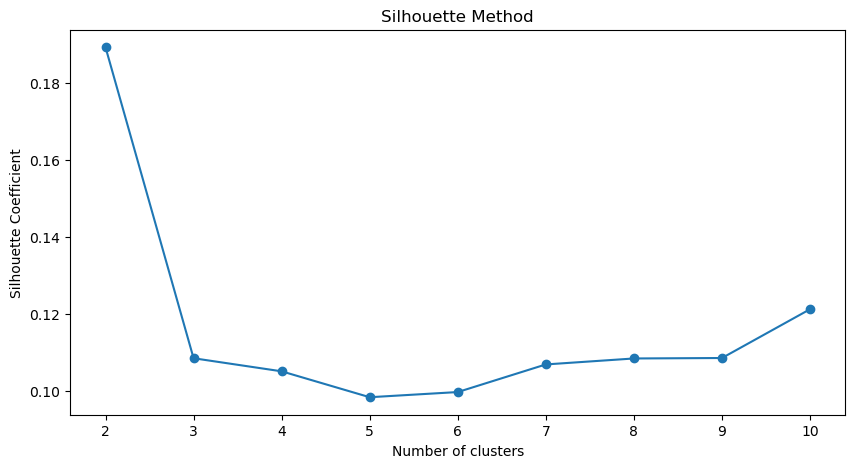

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

<Figure size 1000x800 with 0 Axes>

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Correct the file path - Ensure it is correct and accessible
file_path = r'C:/Users/HP/Downloads/Survey (1).csv'  # Use raw string notation

# Attempt to load the dataset
try:
    data = pd.read_csv(file_path)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"File not found at the specified path: {file_path}")
except pd.errors.EmptyDataError:
    print("The file is empty.")
except pd.errors.ParserError:
    print("Error parsing the file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# Proceed only if data is successfully loaded
if 'data' in locals():
    # Inspect the data
    print(data.head())
    print(data.info())

    # Ensure all relevant columns are numeric and handle any missing values
    data_numeric = data.select_dtypes(include=[float, int])

    # Handle missing values by removing rows with NAs
    data_numeric = data_numeric.dropna()

    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_numeric)

    # Determine the optimal number of clusters using the Elbow method
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(data_scaled)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10, 5))
    plt.plot(range(1, 11), wcss, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

    # Using Silhouette method to determine optimal number of clusters
    silhouette_scores = []
    for n_cluster in range(2, 11):
        kmeans = KMeans(n_clusters=n_cluster).fit(data_scaled)
        label = kmeans.labels_
        sil_coeff = silhouette_score(data_scaled, label, metric='euclidean')
        silhouette_scores.append(sil_coeff)

    plt.figure(figsize=(10, 5))
    plt.plot(range(2, 11), silhouette_scores, marker='o')
    plt.title('Silhouette Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Coefficient')
    plt.show()

    # Choose the optimal number of clusters (e.g., k = 3 based on Elbow and Silhouette methods)
    n_clusters = 3
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    data['Cluster'] = kmeans.labels_

    # Visualizing the clusters
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data_scaled[:, 0], data_scaled[:, 1], hue=data['Cluster'], palette='viridis')
    plt.title('Cluster Plot')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

    # Inspect the resulting clusters
    print(data.groupby('Cluster').mean())
else:
    print("Data could not be loaded. Please check the file path and data format.")


Data loaded successfully.
        City Sex    Age      Occupation Monthly Household Income  Income  \
0  Bangalore   M  26-35  Private Sector         85,001 to105,000   95000   
1  Bangalore   M  46-60  Government/PSU         45,001 to 65,000   55000   
2  Bangalore   F  46-60  Government/PSU         25,001 to 45,000   35000   
3  Bangalore   M  36-45  Private Sector                  >125000  200000   
4  Bangalore   M  26-35   Self Employed         85,001 to105,000   95000   

  Planning to Buy a new house Time Frame Reasons for buying a house  \
0                         Yes  6M to 1Yr                   Residing   
1                         Yes  6M to 1Yr                 Investment   
2                         Yes  <6 Months              Rental Income   
3                         Yes  <6 Months                 Investment   
4                         Yes     1-2 Yr                   Residing   

  what type of House  ... 4. Availability of domestic help Time  Size Budgets  \
0        

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

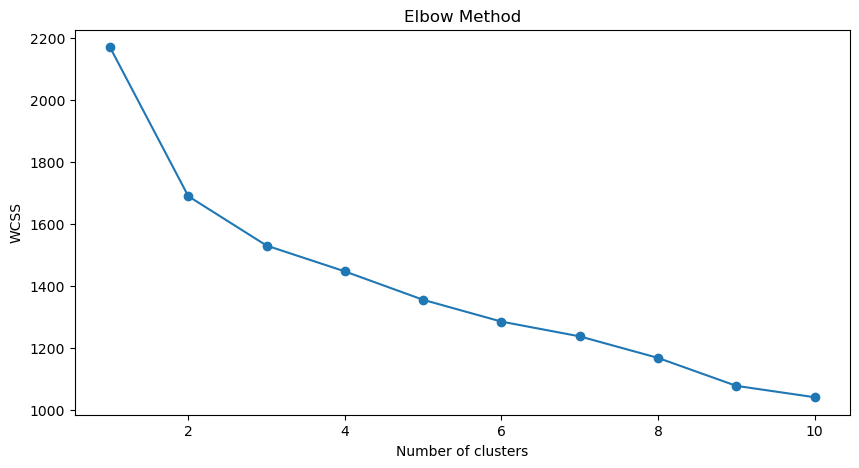

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\a

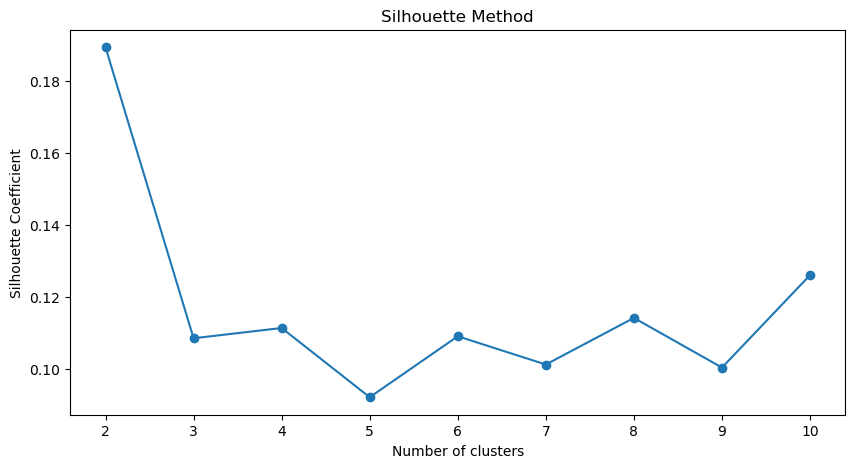

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


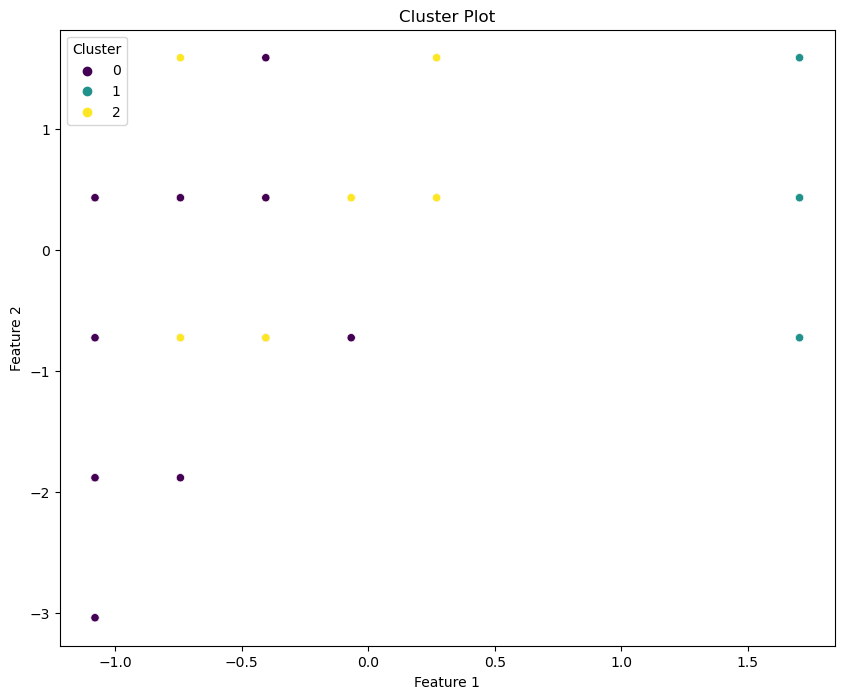

TypeError: agg function failed [how->mean,dtype->object]

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Correct the file path - Ensure it is correct and accessible
file_path = r'C:/Users/HP/Downloads/Survey (1).csv'  # Use raw string notation

# Attempt to load the dataset
try:
    data = pd.read_csv(file_path)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"File not found at the specified path: {file_path}")
except pd.errors.EmptyDataError:
    print("The file is empty.")
except pd.errors.ParserError:
    print("Error parsing the file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# Proceed only if data is successfully loaded
if 'data' in locals():
    # Inspect the data
    print(data.head())
    print(data.info())

    # Ensure all relevant columns are numeric and handle any missing values
    data_numeric = data.select_dtypes(include=[float, int])

    # Handle missing values by removing rows with NAs
    data_numeric = data_numeric.dropna()

    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_numeric)

    # Determine the optimal number of clusters using the Elbow method
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(data_scaled)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10, 5))
    plt.plot(range(1, 11), wcss, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

    # Using Silhouette method to determine optimal number of clusters
    silhouette_scores = []
    for n_cluster in range(2, 11):
        kmeans = KMeans(n_clusters=n_cluster).fit(data_scaled)
        label = kmeans.labels_
        sil_coeff = silhouette_score(data_scaled, label, metric='euclidean')
        silhouette_scores.append(sil_coeff)

    plt.figure(figsize=(10, 5))
    plt.plot(range(2, 11), silhouette_scores, marker='o')
    plt.title('Silhouette Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Coefficient')
    plt.show()

    # Choose the optimal number of clusters (e.g., k = 3 based on Elbow and Silhouette methods)
    n_clusters = 3
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    data['Cluster'] = kmeans.labels_

    # Visualizing the clusters
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=data['Cluster'], palette='viridis')
    plt.title('Cluster Plot')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

    # Inspect the resulting clusters
    print(data.groupby('Cluster').mean())
else:
    print("Data could not be loaded. Please check the file path and data format.")
